In [1]:
# UANL - FCFM
# Aprendizaje Automático
# Francisco Treviño
# 2024-07-20

In [2]:
# NYC Taxi and Limousine Commission
# TLC Trip Record Data
# https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
# https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-04.parquet

In [3]:
# !pip install pyarrow

In [4]:
# !pip install fpdf

In [5]:
# !pip install pandas numpy scikit-learn matplotlib seaborn

In [6]:
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, LinearRegression, Lasso, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score, classification_report, roc_curve, auc
from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA

C:\Users\franc\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\franc\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [7]:
# Configuración para desactivar la notación científica
pd.set_option('display.float_format', '{:.2f}'.format)
np.set_printoptions(suppress=True)

In [8]:
df = pq.read_table('./NYC - Trip Records/yellow_tripdata_2024-04.parquet')
df = df.to_pandas()

In [9]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-04-01 00:02:40,2024-04-01 00:30:42,0.00,5.20,1.00,N,161,7,1,29.60,3.50,0.50,8.65,0.00,1.00,43.25,2.50,0.00
1,2,2024-04-01 00:41:12,2024-04-01 00:55:29,1.00,5.60,1.00,N,264,264,1,25.40,1.00,0.50,10.00,0.00,1.00,37.90,0.00,0.00
2,2,2024-04-01 00:48:42,2024-04-01 01:05:30,1.00,3.55,1.00,N,186,236,1,20.50,1.00,0.50,5.10,0.00,1.00,30.60,2.50,0.00
3,2,2024-04-01 00:56:02,2024-04-01 01:05:09,1.00,1.06,1.00,N,137,164,2,10.00,1.00,0.50,0.00,0.00,1.00,15.00,2.50,0.00
4,1,2024-04-01 00:08:32,2024-04-01 00:10:24,1.00,0.70,1.00,N,236,263,1,5.10,3.50,0.50,2.00,0.00,1.00,12.10,2.50,0.00


In [10]:
df.count()

VendorID                 3514289
tpep_pickup_datetime     3514289
tpep_dropoff_datetime    3514289
passenger_count          3105713
trip_distance            3514289
RatecodeID               3105713
store_and_fwd_flag       3105713
PULocationID             3514289
DOLocationID             3514289
payment_type             3514289
fare_amount              3514289
extra                    3514289
mta_tax                  3514289
tip_amount               3514289
tolls_amount             3514289
improvement_surcharge    3514289
total_amount             3514289
congestion_surcharge     3105713
Airport_fee              3105713
dtype: int64

In [11]:
# LocationID,Borough,Zone,service_zone
# 138,"Queens","LaGuardia Airport","Airports"
query = 'PULocationID == 138'
df = df.query(query)
df.count()

VendorID                 111164
tpep_pickup_datetime     111164
tpep_dropoff_datetime    111164
passenger_count          110553
trip_distance            111164
RatecodeID               110553
store_and_fwd_flag       110553
PULocationID             111164
DOLocationID             111164
payment_type             111164
fare_amount              111164
extra                    111164
mta_tax                  111164
tip_amount               111164
tolls_amount             111164
improvement_surcharge    111164
total_amount             111164
congestion_surcharge     110553
Airport_fee              110553
dtype: int64

In [12]:
zone_file_path = './NYC - Trip Records/taxi_zone_lookup.csv'
zones_df = pd.read_csv(zone_file_path)

df = df.merge(zones_df, how='left', left_on='PULocationID', right_on='LocationID', suffixes=('', '_pickup'))
df = df.merge(zones_df, how='left', left_on='DOLocationID', right_on='LocationID', suffixes=('', '_dropoff'))

df.drop(columns=['LocationID', 'LocationID_dropoff'], inplace=True)

In [13]:
query = ' Borough_dropoff == "Manhattan" '
df = df.query(query)

In [14]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,Borough,Zone,service_zone,Borough_dropoff,Zone_dropoff,service_zone_dropoff
1,2,2024-04-01 00:21:38,2024-04-01 00:36:02,1.00,7.76,1.00,N,138,263,2,...,1.00,48.99,2.50,1.75,Queens,LaGuardia Airport,Airports,Manhattan,Yorkville West,Yellow Zone
2,1,2024-04-01 00:04:50,2024-04-01 00:23:32,1.00,11.50,1.00,N,138,24,1,...,1.00,72.54,0.00,1.75,Queens,LaGuardia Airport,Airports,Manhattan,Bloomingdale,Yellow Zone
5,1,2024-04-01 00:02:28,2024-04-01 00:19:23,1.00,9.70,1.00,N,138,237,1,...,1.00,64.28,2.50,1.75,Queens,LaGuardia Airport,Airports,Manhattan,Upper East Side South,Yellow Zone
7,2,2024-04-01 00:01:06,2024-04-01 00:22:48,2.00,10.22,1.00,N,138,239,1,...,1.00,70.19,2.50,1.75,Queens,LaGuardia Airport,Airports,Manhattan,Upper West Side South,Yellow Zone
9,2,2024-04-01 00:18:35,2024-04-01 00:36:08,1.00,9.40,1.00,N,138,233,1,...,1.00,66.84,2.50,1.75,Queens,LaGuardia Airport,Airports,Manhattan,UN/Turtle Bay South,Yellow Zone


In [15]:
df.count()

VendorID                 77870
tpep_pickup_datetime     77870
tpep_dropoff_datetime    77870
passenger_count          77348
trip_distance            77870
RatecodeID               77348
store_and_fwd_flag       77348
PULocationID             77870
DOLocationID             77870
payment_type             77870
fare_amount              77870
extra                    77870
mta_tax                  77870
tip_amount               77870
tolls_amount             77870
improvement_surcharge    77870
total_amount             77870
congestion_surcharge     77348
Airport_fee              77348
Borough                  77870
Zone                     77870
service_zone             77870
Borough_dropoff          77870
Zone_dropoff             77870
service_zone_dropoff     77870
dtype: int64

In [16]:
df = df.dropna()

In [17]:
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)
df['payment_type'] = df['payment_type'].fillna(1)
df['passenger_count'] = df['passenger_count'].fillna(1)
df['RatecodeID'] = df['RatecodeID'].fillna(1)
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('N')
df['Airport_fee'] = df['Airport_fee'].fillna(0)

In [18]:
nan_columns = df.columns[df.isna().any()].tolist()
print(f'Columnas con NaNs: {nan_columns}')
print(df[df.isna().any(axis=1)])

Columnas con NaNs: []
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, Borough, Zone, service_zone, Borough_dropoff, Zone_dropoff, service_zone_dropoff]
Index: []

[0 rows x 25 columns]


In [19]:
df['trip_duration_seconds'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()

df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
df['dropoff_date'] = df['tpep_dropoff_datetime'].dt.date

df['pickup_day'] = df['tpep_pickup_datetime'].dt.day
df['dropoff_day'] = df['tpep_dropoff_datetime'].dt.day

df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_minute'] = df['tpep_pickup_datetime'].dt.minute
df['pickup_second'] = df['tpep_pickup_datetime'].dt.second

df['dropoff_day_of_week'] = df['tpep_dropoff_datetime'].dt.dayofweek
df['dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour
df['dropoff_minute'] = df['tpep_dropoff_datetime'].dt.minute
df['dropoff_second'] = df['tpep_dropoff_datetime'].dt.second

df['pickup_time'] = df['pickup_hour'].astype(str).str.zfill(2) + ':' + df['pickup_minute'].astype(str).str.zfill(2)
df['dropoff_time'] = df['dropoff_hour'].astype(str).str.zfill(2) + ':' + df['dropoff_minute'].astype(str).str.zfill(2)

df['day_change'] = (df['tpep_pickup_datetime'].dt.date != df['tpep_dropoff_datetime'].dt.date).astype(int)

In [20]:
df.loc[:, 'misc_charges'] = (
    df['extra'] + 
    df['mta_tax'] + 
    df['improvement_surcharge'] + 
    df['tolls_amount'] + 
    df['congestion_surcharge'] +
    df['Airport_fee']    
)

In [21]:
df.loc[:, 'total_amount_calc'] = (df['fare_amount'] + df['extra'] + df['mta_tax'] + df['improvement_surcharge'] + df['tip_amount'] + df['tolls_amount'] + df['congestion_surcharge'] + df['Airport_fee'])

In [22]:
df['total_amount_diff'] = df['total_amount_calc'] - df['total_amount']

In [23]:
df['tip_percent'] = (df['tip_amount'] / df['fare_amount']) * 100
df['misc_charges_percent'] = (df['misc_charges'] / df['fare_amount']) * 100
df['trip_duration_minutes'] = df['trip_duration_seconds'] / 60.00
df['pickup_hour_in_minutes'] = df['pickup_hour'] * 60 + df['pickup_minute'] + df['pickup_second'] / 60.00

In [24]:
df['average_speed'] = np.where(df['trip_duration_minutes'] > 0, 
                               df['trip_distance'] / (df['trip_duration_minutes'] / 60), 0)

In [25]:
# Limpiar registros con datos inválidos, valores negativos
query = ' trip_distance > 0 '
query += ' and tip_amount >= 0 '
query += ' and extra >= 0 '
query += ' and mta_tax >= 0 '
query += ' and tolls_amount >= 0'
query += ' and improvement_surcharge >= 0'
query += ' and congestion_surcharge >= 0'
query += ' and trip_duration_seconds > 0'
query += ' and fare_amount > 0'
query += ' and total_amount > 0' 

df = df.query(query)

In [26]:
# Limpiar registros con datos inválidos, valores negativos y fuera de rango en el limite superior
query = ' trip_distance <= 50 '
query += ' and trip_duration_minutes <= 60'
query += ' and total_amount <= 100 '
query += ' and fare_amount <= 100 '
query += ' and tip_percent <= 50 '

df = df.query(query)

In [27]:
query = 'trip_distance >= 5 and trip_distance <= 15'
df = df.query(query)

In [28]:
query = 'payment_type == 1'
query += ' and passenger_count == 1'
query += ' and RatecodeID == 1'

df = df.query(query)

In [29]:
# Semana del domingo 14 al sabado 20 de abril 2024
query = ' pickup_day >= 14 and pickup_day <= 20'

df = df.query(query)

In [30]:
df.count()

VendorID                  12986
tpep_pickup_datetime      12986
tpep_dropoff_datetime     12986
passenger_count           12986
trip_distance             12986
RatecodeID                12986
store_and_fwd_flag        12986
PULocationID              12986
DOLocationID              12986
payment_type              12986
fare_amount               12986
extra                     12986
mta_tax                   12986
tip_amount                12986
tolls_amount              12986
improvement_surcharge     12986
total_amount              12986
congestion_surcharge      12986
Airport_fee               12986
Borough                   12986
Zone                      12986
service_zone              12986
Borough_dropoff           12986
Zone_dropoff              12986
service_zone_dropoff      12986
trip_duration_seconds     12986
pickup_date               12986
dropoff_date              12986
pickup_day                12986
dropoff_day               12986
pickup_day_of_week        12986
pickup_h

In [31]:
def descriptive_stats(df, variables):
    stats = {}
    for var in variables:
        stats[var] = {
            'Min': df[var].min(),
            'Max': df[var].max(),
            'Median': df[var].median(),
            'Mode': df[var].mode()[0],
            'Mean': df[var].mean(),
            'Std': df[var].std(),
            'Count': df[var].count()
        }
    return pd.DataFrame(stats)

In [32]:
# Crear variable de clasificación: si la propina es mayor a 0
df['tip_given'] = (df['tip_amount'] > 0).astype(int)
df['same_location'] = (df['PULocationID'] == df['DOLocationID']).astype(int)
df['paid_tolls'] = (df['tolls_amount'] > 0).astype(int)
df['same_day'] = (df['pickup_day'] == df['dropoff_day']).astype(int)

In [33]:
def peak_hour_class(hour):
    if 7 <= hour <= 9:
        return 'Morning Peak'
    elif 16 <= hour <= 18:
        return 'Evening Peak'
    else:
        return 'Off-Peak'

df['pickup_hour_class'] = df['pickup_hour'].apply(peak_hour_class)

In [34]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_percent,misc_charges_percent,trip_duration_minutes,pickup_hour_in_minutes,average_speed,tip_given,same_location,paid_tolls,same_day,pickup_hour_class
46599,2,2024-04-14 00:17:33,2024-04-14 00:37:24,1.00,9.09,1.00,N,138,239,1,...,28.92,49.18,19.85,17.55,27.48,1,0,1,1,Off-Peak
46601,2,2024-04-14 00:11:28,2024-04-14 00:30:26,1.00,8.51,1.00,N,138,100,1,...,38.27,53.10,18.97,11.47,26.92,1,0,1,1,Off-Peak
46602,2,2024-04-14 00:07:33,2024-04-14 00:24:21,1.00,8.31,1.00,N,138,116,1,...,24.35,26.81,16.80,7.55,29.68,1,0,0,1,Off-Peak
46603,2,2024-04-14 00:06:25,2024-04-14 00:26:10,1.00,8.56,1.00,N,138,116,1,...,18.98,45.99,19.75,6.42,26.01,1,0,1,1,Off-Peak
46604,1,2024-04-14 00:59:02,2024-04-14 01:23:11,1.00,9.70,1.00,N,138,143,1,...,29.87,60.37,24.15,59.03,24.10,1,0,1,1,Off-Peak


In [35]:
df.to_csv('./csv/subset_3_yellow_tripdata_2024-04.csv', index=False)

In [36]:
# https://gitlab.com/ppGodel/machine_learning/-/blob/master/classes/classification.org?ref_type=heads

from typing import Any, List, Tuple, Union, Dict
import matplotlib
from matplotlib.axes import Axes
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import numbers
import pandas as pd
import numpy as np
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier


def print_tabulate(df: pd.DataFrame):
    print(tabulate(df, headers=df.columns, tablefmt="orgtbl"), flush=True)

def transform_variable(df: pd.DataFrame, x:str)->pd.DataFrame:
    if isinstance(df[x][0], numbers.Number):
        return df[x]
    else:
        return pd.DataFrame({x: [i for i in range(0, len(df[x]))]})

def split_train_test(df: pd.DataFrame, x_label:str, y_label:str, test_size:float=0.3, random_state:int=0):
    fixed_x = transform_variable(df, x_label)
    return train_test_split(fixed_x, df[y_label], test_size=test_size, random_state = random_state)


def split_train_test_classification(df: pd.DataFrame, x_labels:List[str], y_label:str, test_size:float=0.3, random_state:int=0):
    fixed_x = df[x_labels]
    return train_test_split(fixed_x, df[y_label], test_size=test_size, random_state = random_state)


def train_model(x,y,
                model_class: Union[type[KNeighborsClassifier], type[LogisticRegression], type[SVC]],
                model_params: Dict[str, Any]) \
        -> Union[KNeighborsClassifier, LogisticRegression, SVC]:
    print(f"using {model_class.__name__} with {model_params}")
    # print(f"params? {model_params is None or len(model_params)==0}")
    model = model_class() if model_params is None or len(model_params) == 0 else model_class(**model_params)
    trained_model = model.fit(x,y)
    return trained_model


def create_plot(subplots:int=111)-> Tuple[Figure, Axes]:
    fig = plt.figure()
    ax = fig.add_subplot(subplots)
    return fig, ax


def plot_points(ax:Axes, x,y, scatter_params:Dict[str,Any]):
    return ax.scatter(x,y, **scatter_params)


def plot_line(ax:Axes, x,y, color, label='line'):
    return ax.plot(x,y, color=color, label=label)


def finalize_and_save(fig:Figure, ax:Axes, file_name:str, ylim=None, rotation:int=90, size_inches:Tuple[int,int]=(27,18)):
    ax.tick_params(axis='x', labelrotation=rotation)
    fig.set_size_inches(*size_inches)
    # axis.set_xlim([min(fixed_x), max(fixed_x)])
    if ylim is not None:
        ax.set_ylim(ylim)
    fig.savefig(file_name)
    plt.close()

def detect_outlier(df: pd.DataFrame, x:str, y:str)-> pd.DataFrame:
    fixed_x = transform_variable(df, x)
    model= sm.OLS(df[y],sm.add_constant(fixed_x)).fit()
    bands = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]
    coef = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']
    lr_dict = {'m': coef.values[1], 'b': coef.values[0], 'low_band': bands['[0.025'].iloc[0], 'hi_band': bands['0.975]'].iloc[0]}
    def outlier_dist(y:float, x:float, lr_dict:Dict[str,float])-> int:
        # predict = 1 if y > (lr_dict['m']*x+1.2*lr_dict['hi_band']) or y < (lr_dict['m']*x+0.8*lr_dict['low_band']) else 0
        # print(f"y:{y} yhat_hi:{lr_dict['m']*x+lr_dict['hi_band']} yhat_lo:{lr_dict['m']*x+lr_dict['low_band']} predict: {predict}")
        return 1 if y > (lr_dict['m']*x+(1*lr_dict['hi_band'])) or y < (lr_dict['m']*x+(1*lr_dict['low_band'])) else 0

    outlier_df = pd.DataFrame({'outliers': [outlier_dist(row[y],row[x], lr_dict) for _, row in fixed_x.join(df[y]).iterrows()]})
    return df.join(outlier_df)

In [37]:
def knn_classification_model(df: pd.DataFrame, x:List[str], y: str, df_predict:pd.DataFrame, n_neighbors:int)->None:
    features = df[x]
    trained_model = train_model(features, df[y], KNeighborsClassifier, {'n_neighbors':n_neighbors}) # type: KNeighborsClassifier
    df_predict[y]=trained_model.predict(df_predict)

    fig, ax = create_plot()
    categories = np.unique(df[y])
    for index, class_ in enumerate(categories):
        filter_df = df[df[y]==class_]
        filter_predict_df = df_predict[df_predict[y]==class_]
        filter_features = [filter_df[label] for label in x]
        filter_predict = [filter_predict_df[label] for label in x]
        plot_points(ax, *filter_features, scatter_params={'marker':'.', 'c':f"C{index}", 'label':class_})
        if len(filter_predict) > 0:
            plot_points(ax, *filter_predict, scatter_params={'marker':'x', 'c':f"C{index}", 'label':class_})

    ax.legend(loc="upper left")
    ax.set_xlabel(x[0])
    ax.set_ylabel(x[1])
    ax.set_title(f"knn_classifier")
    finalize_and_save(fig, ax, f'img/knn_classifier_{y}_{"_".join(x)}.png', size_inches=(11,6), rotation=0)

In [38]:
df_predict = pd.DataFrame([{"trip_duration_minutes":15, "trip_distance":8},
                           {"trip_duration_minutes":30, "trip_distance":10},
                           {"trip_duration_minutes":45, "trip_distance":12},
                        ])

knn_classification_model(df, ["trip_duration_minutes", "trip_distance"], "tip_given", df_predict, 10)

using KNeighborsClassifier with {'n_neighbors': 10}


In [39]:
def knn_classification_model_predict(df: pd.DataFrame, x:List[str], y: str, n_neighbors:int, test_size:int=0.3)->None:
    X_train, X_test, y_train, y_test = split_train_test_classification(df,x,y,test_size=test_size, random_state = 0)
    trained_model = train_model(X_train, y_train, KNeighborsClassifier, {'n_neighbors':n_neighbors}) # type: KNeighborsClassifier
    score_test = trained_model.score(X_test, y_test)
    score_train = trained_model.score(X_train, y_train)
    predict = trained_model.predict(X_test)
    print(f"scores:[train {score_train:.4}, test {score_test:.4}]")

    fig, ax = create_plot()
    categories = np.unique(df[y])
    for index, class_ in enumerate(categories):
        filter_train_df = X_train[y_train==class_]
        filter_test_df_correct = X_test[(y_test==class_) & (predict==class_)]
        filter_test_df_failure = X_test[(y_test!=class_) & (predict==class_)]
        # filter_predict_df = df_predict[df_predict[y]==class_]
        # filter_features = [filter_df[label] for label in x]
        # filter_predict = [filter_predict_df[label] for label in x]


        plot_points(ax, filter_train_df[x[0]], filter_train_df[x[1]], scatter_params={'marker':'.', 'c':f"C{index}", 'label':class_})
        if len(filter_test_df_correct) > 0:
            plot_points(ax, filter_test_df_correct[x[0]], filter_test_df_correct[x[1]], scatter_params={'marker':'v', 'c':f"C{index}", 'label':class_})
        if len(filter_test_df_failure) > 0:
            plot_points(ax, filter_test_df_failure[x[0]], filter_test_df_failure[x[1]], scatter_params={'marker':'x', 'c':f"C{index}", 'label':class_})

    ax.legend(loc="upper left")
    ax.set_xlabel(x[0])
    ax.set_ylabel(x[1])
    ax.set_title(f"KNN Classifier scores:[train {score_train:.4}, test {score_test:.4}]")
    finalize_and_save(fig, ax, f'img/knn_classifier_model_{y}_{"_".join(x)}.png', size_inches=(11,6), rotation=0)

# df=prepare_file()
knn_classification_model_predict(df, ["trip_duration_minutes", "trip_distance"], "tip_given", 5, 0.3)

using KNeighborsClassifier with {'n_neighbors': 5}
scores:[train 0.9728, test 0.9725]



Análisis para el objetivo de clasificación: tip_given



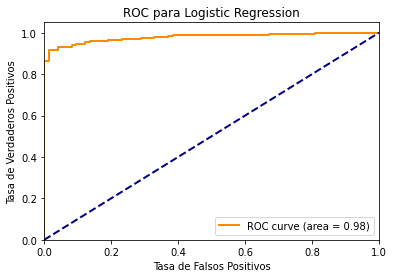

Timestamp: 2024-07-21 01:04:37.177203
Logistic Regression - Cross-Validation Accuracy: 0.9735272379139417, Test Accuracy: 0.9734411085450346, Test ROC AUC: 0.9783317509833176
Reporte de Clasificacion para Logistic Regression:
              precision    recall  f1-score   support

           0       0.59      0.18      0.27        73
           1       0.98      1.00      0.99      2525

    accuracy                           0.97      2598
   macro avg       0.78      0.59      0.63      2598
weighted avg       0.97      0.97      0.97      2598



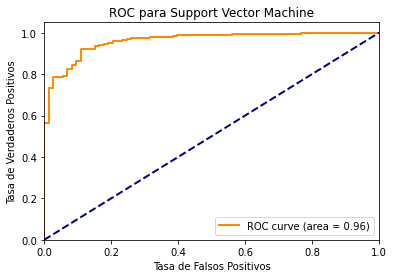

C:\Users\franc\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\franc\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\franc\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Timestamp: 2024-07-21 01:04:45.345516
Support Vector Machine - Cross-Validation Accuracy: 0.9727569887530277, Test Accuracy: 0.9719014626635873, Test ROC AUC: 0.9603960396039604
Reporte de Clasificacion para Support Vector Machine:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.97      1.00      0.99      2525

    accuracy                           0.97      2598
   macro avg       0.49      0.50      0.49      2598
weighted avg       0.94      0.97      0.96      2598



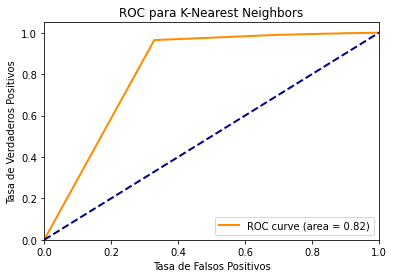

Timestamp: 2024-07-21 01:04:45.721443
K-Nearest Neighbors - Cross-Validation Accuracy: 0.9717941541323158, Test Accuracy: 0.9703618167821401, Test ROC AUC: 0.8198426691984266
Reporte de Clasificacion para K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.46      0.30      0.36        73
           1       0.98      0.99      0.98      2525

    accuracy                           0.97      2598
   macro avg       0.72      0.65      0.67      2598
weighted avg       0.97      0.97      0.97      2598



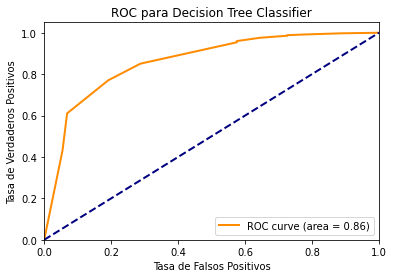

Timestamp: 2024-07-21 01:04:45.837698
Decision Tree Classifier - Cross-Validation Accuracy: 0.9711201513621621, Test Accuracy: 0.9722863741339491, Test ROC AUC: 0.8609114336091143
Reporte de Clasificacion para Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.53      0.11      0.18        73
           1       0.97      1.00      0.99      2525

    accuracy                           0.97      2598
   macro avg       0.75      0.55      0.58      2598
weighted avg       0.96      0.97      0.96      2598



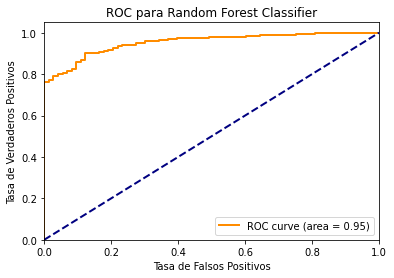

C:\Users\franc\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\franc\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\franc\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Timestamp: 2024-07-21 01:04:48.271674
Random Forest Classifier - Cross-Validation Accuracy: 0.972853327822065, Test Accuracy: 0.9719014626635873, Test ROC AUC: 0.9525729011257289
Reporte de Clasificacion para Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.97      1.00      0.99      2525

    accuracy                           0.97      2598
   macro avg       0.49      0.50      0.49      2598
weighted avg       0.94      0.97      0.96      2598



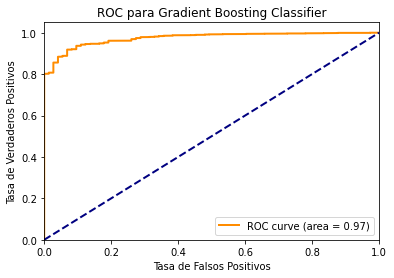

Timestamp: 2024-07-21 01:04:53.632120
Gradient Boosting Classifier - Cross-Validation Accuracy: 0.9738154673556988, Test Accuracy: 0.9753656658968437, Test ROC AUC: 0.9738613861386138
Reporte de Clasificacion para Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.65      0.27      0.38        73
           1       0.98      1.00      0.99      2525

    accuracy                           0.98      2598
   macro avg       0.81      0.63      0.69      2598
weighted avg       0.97      0.98      0.97      2598

                             Cross-Validation Accuracy Test Accuracy  \
Logistic Regression                               0.97          0.97   
Support Vector Machine                            0.97          0.97   
K-Nearest Neighbors                               0.97          0.97   
Decision Tree Classifier                          0.97          0.97   
Random Forest Classifier                          0.97          0.97 

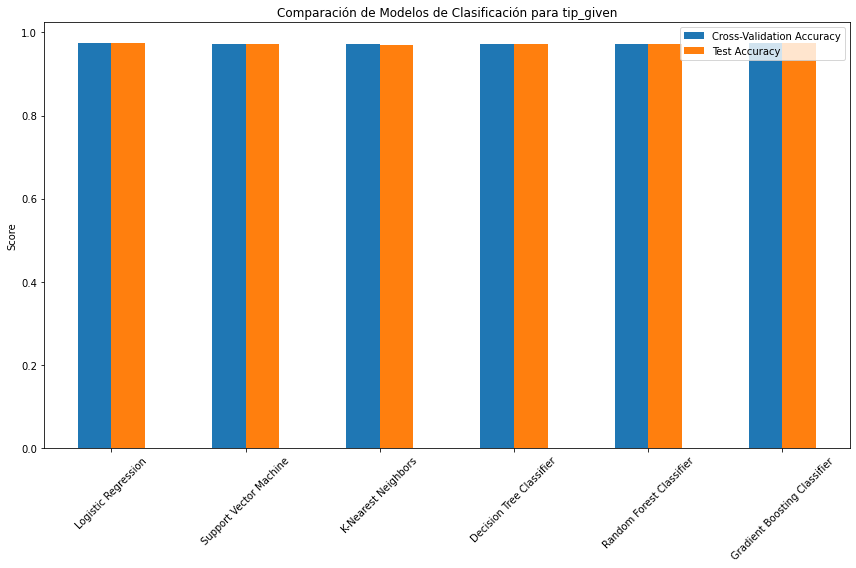


Análisis para el objetivo de clasificación: pickup_hour_class

Timestamp: 2024-07-21 01:04:53.971839
Logistic Regression - Cross-Validation Accuracy: 0.728725353949925, Test Accuracy: 0.7109314857582756, Test ROC AUC: 0.6681144461777674
Reporte de Clasificacion para Logistic Regression:
              precision    recall  f1-score   support

Evening Peak       0.18      0.00      0.01       494
Morning Peak       0.00      0.00      0.00       252
    Off-Peak       0.71      1.00      0.83      1852

    accuracy                           0.71      2598
   macro avg       0.30      0.33      0.28      2598
weighted avg       0.54      0.71      0.59      2598



C:\Users\franc\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\franc\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\franc\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Timestamp: 2024-07-21 01:07:03.070338
Support Vector Machine - Cross-Validation Accuracy: 0.7302657132543374, Test Accuracy: 0.7128560431100847, Test ROC AUC: 0.612670041326253
Reporte de Clasificacion para Support Vector Machine:
              precision    recall  f1-score   support

Evening Peak       0.00      0.00      0.00       494
Morning Peak       0.00      0.00      0.00       252
    Off-Peak       0.71      1.00      0.83      1852

    accuracy                           0.71      2598
   macro avg       0.24      0.33      0.28      2598
weighted avg       0.51      0.71      0.59      2598

Timestamp: 2024-07-21 01:07:03.452653
K-Nearest Neighbors - Cross-Validation Accuracy: 0.653445569816168, Test Accuracy: 0.6358737490377213, Test ROC AUC: 0.5987032000744213
Reporte de Clasificacion para K-Nearest Neighbors:
              precision    recall  f1-score   support

Evening Peak       0.30      0.29      0.29       494
Morning Peak       0.25      0.15      0.19       252


C:\Users\franc\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\franc\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\franc\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Timestamp: 2024-07-21 01:07:06.080458
Random Forest Classifier - Cross-Validation Accuracy: 0.7302657132543374, Test Accuracy: 0.7128560431100847, Test ROC AUC: 0.6899600525342034
Reporte de Clasificacion para Random Forest Classifier:
              precision    recall  f1-score   support

Evening Peak       0.00      0.00      0.00       494
Morning Peak       0.00      0.00      0.00       252
    Off-Peak       0.71      1.00      0.83      1852

    accuracy                           0.71      2598
   macro avg       0.24      0.33      0.28      2598
weighted avg       0.51      0.71      0.59      2598

Timestamp: 2024-07-21 01:07:22.589406
Gradient Boosting Classifier - Cross-Validation Accuracy: 0.7361378552300437, Test Accuracy: 0.7205542725173211, Test ROC AUC: 0.7287662943343763
Reporte de Clasificacion para Gradient Boosting Classifier:
              precision    recall  f1-score   support

Evening Peak       0.60      0.07      0.13       494
Morning Peak       0.46      0

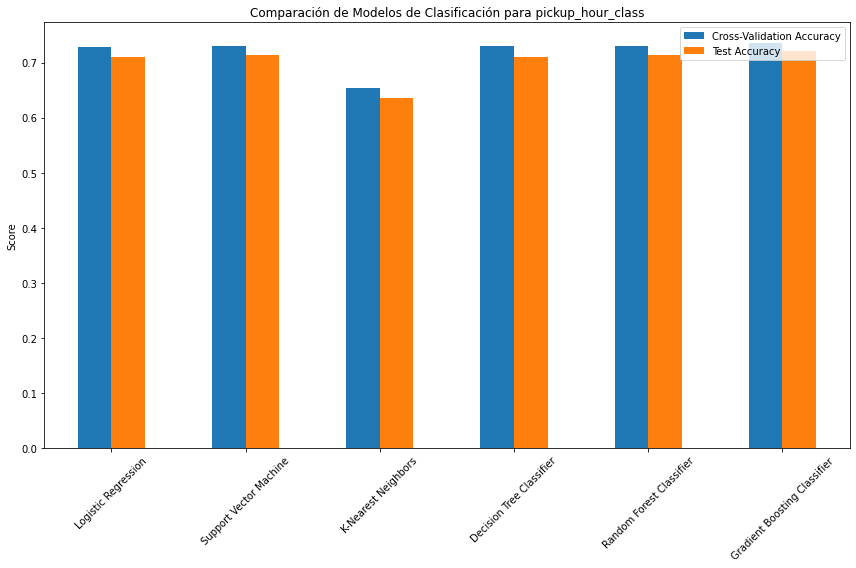

Resultados completos de clasificación:
                             Cross-Validation Accuracy Test Accuracy  \
Logistic Regression                               0.97          0.97   
Support Vector Machine                            0.97          0.97   
K-Nearest Neighbors                               0.97          0.97   
Decision Tree Classifier                          0.97          0.97   
Random Forest Classifier                          0.97          0.97   
Gradient Boosting Classifier                      0.97          0.98   
Logistic Regression                               0.73          0.71   
Support Vector Machine                            0.73          0.71   
K-Nearest Neighbors                               0.65          0.64   
Decision Tree Classifier                          0.73          0.71   
Random Forest Classifier                          0.73          0.71   
Gradient Boosting Classifier                      0.74          0.72   

                        

In [40]:
# Seleccionar variables relevantes para clasificación
features_classification = [
    'trip_distance',
    'trip_duration_minutes',
    'DOLocationID',
    'total_amount_calc'
]

scaler = StandardScaler()
X_class_scaled = scaler.fit_transform(df[features_classification])

targets_classification = {
    'tip_given': df['tip_given'],
    'pickup_hour_class': df['pickup_hour_class']
}

def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'ROC para {model_name}')
    plt.legend(loc="lower right")
    plt.show()

models_classification = {
    'Logistic Regression': LogisticRegression(max_iter=50, solver='saga'),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=4),
    'Decision Tree Classifier': DecisionTreeClassifier(max_depth=4),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, max_depth=4),
    'Gradient Boosting Classifier': GradientBoostingClassifier(n_estimators=100, max_depth=4)
}

# DataFrame para almacenar todos los resultados
all_results_df = pd.DataFrame()

# Resultados de los modelos de clasificación
for target_name, target in targets_classification.items():
    print(f"\nAnálisis para el objetivo de clasificación: {target_name}\n")
    results_classification = {}
    
    # Dividir en conjuntos de entrenamiento y prueba
    X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class_scaled, target, test_size=0.2, random_state=42)

    for name, model in models_classification.items():
        start_time = datetime.datetime.now()
        
        # Entrenar el modelo
        model.fit(X_train_class, y_train_class)
        
        # Validación cruzada
        cv_scores = cross_val_score(model, X_train_class, y_train_class, cv=5, scoring='accuracy')
        mean_cv_score = cv_scores.mean()
        
        # Predicciones y evaluación
        y_pred_class = model.predict(X_test_class)
        accuracy = accuracy_score(y_test_class, y_pred_class)
        if hasattr(model, "predict_proba"):
            if len(np.unique(y_train_class)) == 2:
                roc_auc = roc_auc_score(y_test_class, model.predict_proba(X_test_class)[:, 1])
                plot_roc_curve(y_test_class, model.predict_proba(X_test_class)[:, 1], name)
            else:  # Multiclass classification
                roc_auc = roc_auc_score(y_test_class, model.predict_proba(X_test_class), multi_class='ovr')
        else:
            roc_auc = "N/A"
        class_report = classification_report(y_test_class, y_pred_class)
        
        # Guardar los resultados
        results_classification[name] = {
            'Cross-Validation Accuracy': mean_cv_score,
            'Test Accuracy': accuracy,
            'Test ROC AUC': roc_auc,
            'Classification Report': class_report,
            'Model': name,
            'Target': target_name
        }
        end_time = datetime.datetime.now()
        print(f'Timestamp: {end_time}')
        print(f'{name} - Cross-Validation Accuracy: {mean_cv_score}, Test Accuracy: {accuracy}, Test ROC AUC: {roc_auc}')
        print(f'Reporte de Clasificacion para {name}:\n{class_report}')
    
    # Mostrar los resultados de clasificación
    results_classification_df = pd.DataFrame(results_classification).T
    all_results_df = pd.concat([all_results_df, results_classification_df])
    
    print(results_classification_df)
    
    # Gráficos de resultados de clasificación
    results_classification_df[['Cross-Validation Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(12, 8))
    plt.title(f'Comparación de Modelos de Clasificación para {target_name}')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

# Guardar todos los resultados en un archivo CSV
all_results_df.to_csv('resultados_clasificacion.csv', index=False)

# Mostrar el DataFrame final
print("Resultados completos de clasificación:")
print(all_results_df)
